Dataset Head:
   PID          Names             Date Brand  \
0    1  Vanshika Garg  August 02, 2024   Ola   
1    2  Anshul Mittal    July 29, 2024   Ola   
2    3           Teja    July 28, 2024   Ola   
3    4   Priyanka Pri    July 31, 2024   Ola   
4    5  Shashidhar Nc    July 12, 2024   Ola   

                                    Comment   Outcome Source_File  Name  \
0                      Worst services ever.  Negative    Ola.xlsx   NaN   
1  You are bloody harassing your customers…  Negative    Ola.xlsx   NaN   
2  I had booked a OLA parcel today and the…  Negative    Ola.xlsx   NaN   
3    Highly disappointed by ola service in…  Negative    Ola.xlsx   NaN   
4                   Ola cab not trustworthy  Negative    Ola.xlsx   NaN   

                           Cleaned_Comment  Polarity_Combined  Score_0_10  \
0                      worst services ever           -0.64995        1.75   
1  you are bloody harassing your customers           -0.61530        1.92   
2  i had booked

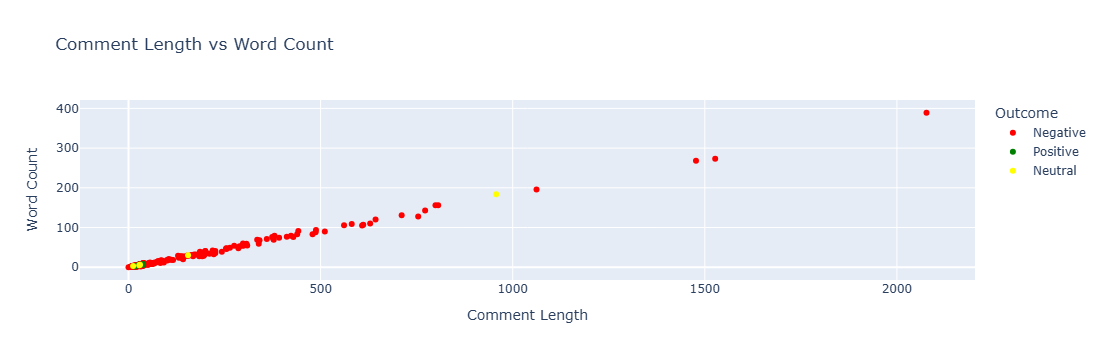

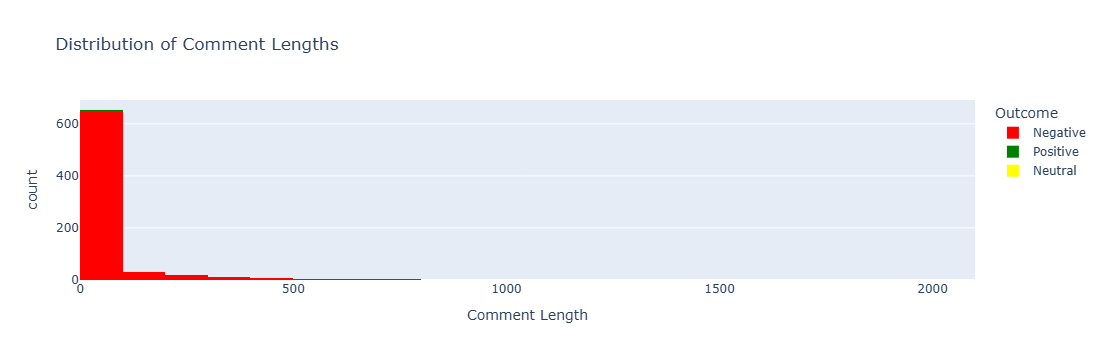

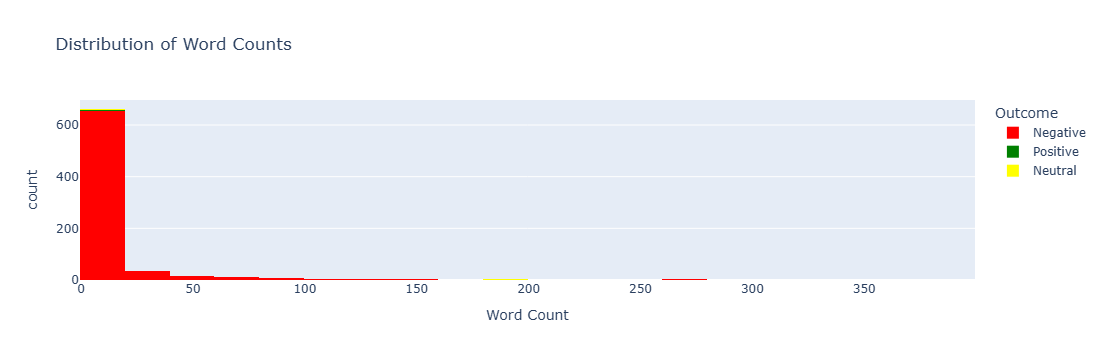


Top 20 Bigrams:
                  count
ola cab              33
worst service        24
worst experience     23
booked ola           20
use ola              20
customer service     17
bad service          17
bad experience       17
customer support     16
experience ola       14
ola auto             14
ola app              14
ola driver           14
book ola             13
worst app            12
cab service          12
ola cabs             12
customer care        11
ola service          10
service ola          10


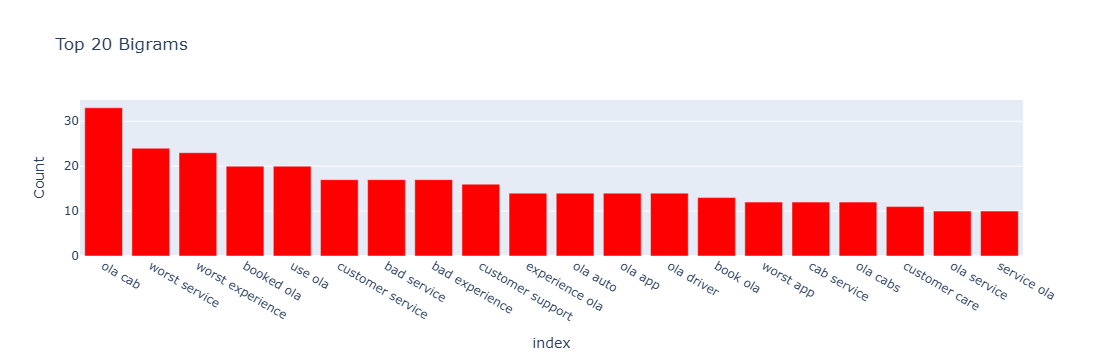


Top 20 Trigrams:
                              count
bad experience ola                6
booked ola cab                    5
worst worst worst                 5
worst cab service                 5
cab service provider              4
send email ola                    4
ola post paid                     4
worst experience ola              4
customer care service             3
ola customer care                 3
use ola post                      3
charged cancellation fee          3
don book ola                      3
worst customer service            3
experience ola cab                3
booked ola auto                   3
ask extra money                   3
ola cab driver                    3
class service ola                 2
money absolutely infuriating      2


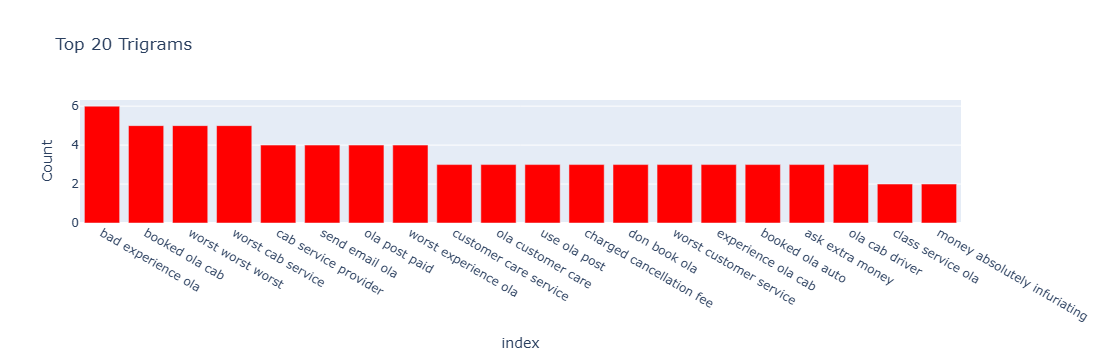

In [1]:
import pandas as pd 
import plotly.express as px 
from sklearn.feature_extraction.text import CountVectorizer 

# Load your dataset 
file_path = r"C:\Users\har15\Downloads\ba proj\post-data\Ola_Graded.xlsx"  # Update this with your actual file path
df = pd.read_excel(file_path) 

# Basic EDA 
print("Dataset Head:") 
print(df.head()) 
print("\nMissing Values:") 
print(df.isnull().sum()) 

# Replace NaN values with an empty string before applying the length function
df['comment_length'] = df['Comment'].fillna('').apply(len)
df['word_count'] = df['Comment'].fillna('').apply(lambda x: len(x.split())) 

# Interactive scatter plot for comment length vs word count 
fig = px.scatter(df, x='comment_length', y='word_count', 
                 color='Outcome', 
                 title='Comment Length vs Word Count', 
                 labels={'comment_length': 'Comment Length', 
                         'word_count': 'Word Count'}, 
                 hover_data=['Comment'],
                 color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig.show() 

# Interactive histogram for comment lengths 
fig_length = px.histogram(df, x='comment_length', nbins=30, 
                          color='Outcome', 
                          title='Distribution of Comment Lengths', 
                          labels={'comment_length': 'Comment Length'},
                          color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_length.show() 

# Interactive histogram for word counts 
fig_word_count = px.histogram(df, x='word_count', nbins=30, 
                              color='Outcome', 
                              title='Distribution of Word Counts', 
                              labels={'word_count': 'Word Count'},
                              color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_word_count.show() 

# N-gram analysis function 
def get_ngrams(comments, n=2, top_n=20):  
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english') 
    ngrams = vectorizer.fit_transform(comments) 
    ngram_counts = ngrams.sum(axis=0) 
    ngram_features = vectorizer.get_feature_names_out() 
    # Create a DataFrame of n-grams and their counts 
    ngram_df = pd.DataFrame(ngram_counts.A1, index=ngram_features, columns=['count']) 
    return ngram_df.sort_values(by='count', ascending=False).head(top_n) 

# Generate and display bigrams 
comments = df['Comment'].dropna() 
bigrams = get_ngrams(comments, n=2, top_n=20)  
print("\nTop 20 Bigrams:") 
print(bigrams) 

# Bar plot for bigrams 
fig_bigrams = px.bar(bigrams, x=bigrams.index, y='count', 
                     title='Top 20 Bigrams', 
                     labels={'x': 'Bigrams', 'count': 'Count'},
                     color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_bigrams.show() 

# Generate and display trigrams 
trigrams = get_ngrams(comments, n=3, top_n=20)  
print("\nTop 20 Trigrams:") 
print(trigrams) 

# Bar plot for trigrams 
fig_trigrams = px.bar(trigrams, x=trigrams.index, y='count', 
                      title='Top 20 Trigrams', 
                      labels={'x': 'Trigrams', 'count': 'Count'},
                      color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_trigrams.show()
